## Outlier_detection
1.   Dataset: Heart Disease UCI dataset from Kaggle
2.   link: https://www.kaggle.com/ronitf/heart-disease-uci

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
# Some standard imports

import os

# scipy imports
# There are several universal functions for numpy arrays that are available through the scipy package
import scipy as sc
from scipy import stats, integrate
from scipy.stats.mstats import mode

# numpy imports
# pandas depends on numpy
import numpy as np
np.set_printoptions(precision=4, threshold=500, suppress=True)
np.random.seed(12345)
np.random.seed(sum(map(ord, "distributions")))

# pandas imports
# The convention is to import pandas package with a pd prefix. 
# Also, since we most commonly use Series and DataFrame classes from this package, 
# we import them into the current namespace, so we do not have to refer to them with the pd prefix.
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_columns', None) # enables showing all columns
pd.options.display.max_rows = 25
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.notebook_repr_html = True
np.set_printoptions(precision=4, suppress=True)

# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.font_manager
#plt.rc('figure', figsize=(10, 6))
#plt.subplots(figsize=(10,6))
plt.rcParams.update({'figure.figsize': (20, 10), 'figure.dpi': 120})
# Prior versions of matplotlib used an implicitly registered datetime converter for a matplotlib plotting method. 
# The converter is registered by pandas on import. 
# Future versions of pandas will require you to explicitly register matplotlib converters, as follows:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# seaborn imports
import seaborn as sns
sns.set(color_codes=True)

# bokeh imports
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') #enable if needed to see the warning the first time.

# logging setup
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## importing Heart Disease UCI dataset

In [0]:
# reading Heart Disease UCI dataset
df = pd.read_csv("/gdrive/My Drive/Data-Quality/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##we drop our binary variables, because there is no outliers in binary features

In [0]:
df.drop(columns=['sex','fbs','exang','target'],inplace=True)

In [0]:
df.describe()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


## ploting two variables on seaborn to see the distribution

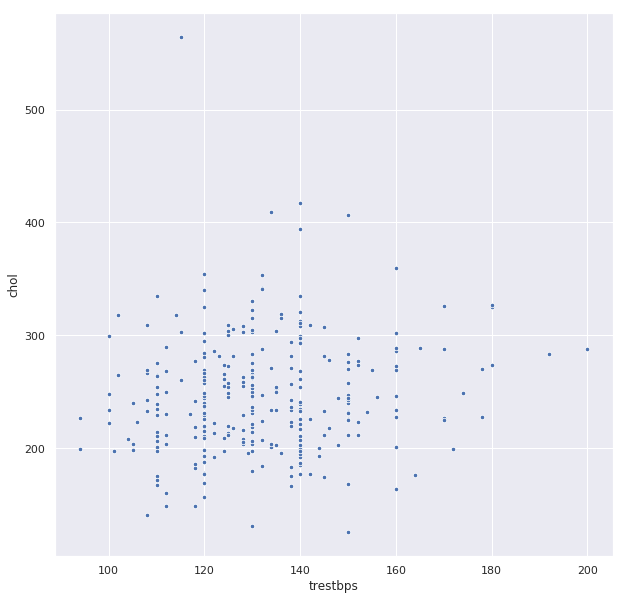

In [0]:
s, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot('trestbps','chol', data=df, s=20)

The range of "chol" is between (126-564) and the range of "trestbps" is between (94-200).  Data is not scaled. Now we are going to scal the whole dataset

## scaling data with MinMaxScaler

In [0]:
from sklearn.preprocessing import MinMaxScaler

scal = MinMaxScaler(feature_range=(0, 1))
df2= scal.fit_transform(df)


In [0]:
type(df2)

numpy.ndarray

In [0]:
df2 = pd.DataFrame(df2, columns = df.columns.to_list())

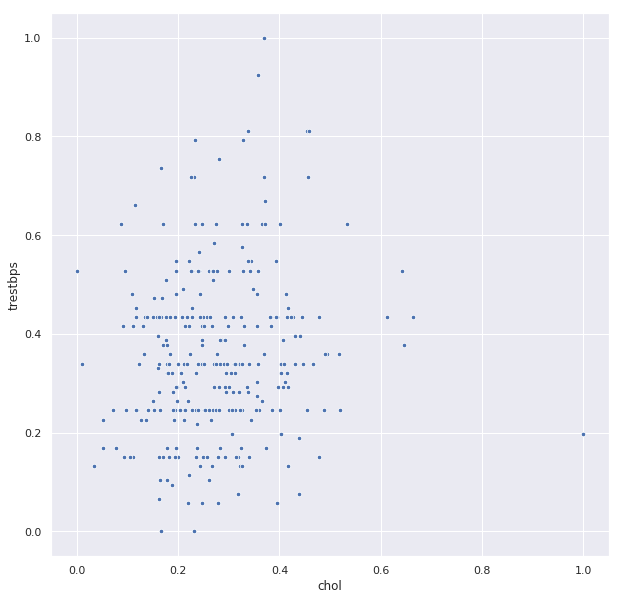

In [0]:
s, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot('chol','trestbps', data=df2, s=20)

You can see in above fig that our values for these two column are scaled now.

Now we are going to import appropriate models for oulier detection

In [0]:
! pip install pyod

## import desired outlier detection models/ We fit  models on the ENTIRE DATASET

In [0]:
# Import models
from pyod.models.knn import KNN # proximity
from pyod.models.abod import ABOD # proximity
from pyod.models.cblof import CBLOF # proximity
from pyod.models.lof import LOF # proximity
from pyod.models.hbos import HBOS # proximity


outliers_fraction = 0.05
random_state = np.random.RandomState(12345)

# Define 4 outlier detection tools to be compared
classifiers = {'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
               'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
               'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
               'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction)}

## outlier detection with LOF model

In [0]:
# train LOF detector
clf_name = 'LOF' 
clf = LOF()
clf.fit(df2)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, p=2)

In [0]:
# predict raw anomaly score
scores_pred = clf.decision_function(df2)
scores_pred

array([1.1818, 1.2067, 0.9852, 0.9707, 1.044 , 1.1024, 0.9806, 0.9951,
       1.154 , 1.0684, 1.0197, 1.0057, 0.9715, 1.0257, 1.0378, 1.0348,
       1.0183, 1.1964, 1.1272, 1.2134, 0.9901, 0.9856, 1.0278, 1.028 ,
       1.2815, 1.2078, 1.0585, 1.1266, 1.0479, 1.0648, 1.011 , 1.0671,
       0.9866, 1.0979, 1.0955, 1.1127, 0.9952, 1.0339, 1.0586, 1.033 ,
       1.0084, 0.9782, 1.0236, 0.9889, 1.0279, 0.9813, 1.0152, 0.9838,
       1.4313, 0.9846, 0.9805, 0.9847, 1.1457, 1.1252, 0.995 , 1.0019,
       1.0079, 1.0228, 1.2109, 0.9958, 1.0457, 1.0465, 1.1897, 1.0675,
       0.9802, 1.1452, 1.0659, 0.979 , 0.9797, 1.0311, 1.0086, 1.1734,
       1.1136, 1.0023, 1.0892, 0.9806, 1.0012, 0.988 , 0.9643, 1.0089,
       0.9871, 0.9742, 1.1053, 1.0862, 1.0199, 1.3822, 1.1592, 1.0703,
       1.0474, 0.9905, 1.1507, 1.0251, 1.2262, 0.9606, 1.0585, 1.0671,
       1.0034, 1.1671, 1.114 , 1.1669, 1.1737, 1.2818, 1.1317, 1.1383,
       0.9891, 1.0105, 1.0826, 1.0005, 0.9704, 0.9868, 1.2477, 1.1429,
      

In [0]:
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(df2)

n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

In [0]:
n_inliers, n_outliers

(277, 26)

In [0]:
df2[y_pred == 1][:10] # outliers

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
1,0.166667,0.666667,0.339623,0.283105,0.5,0.885496,0.564516,0.0,0.0,0.666667
19,0.833333,1.000000,0.433962,0.257991,0.5,0.610687,0.290323,1.0,0.5,0.666667
24,0.229167,1.000000,0.433962,0.166667,0.5,0.816794,0.225806,1.0,0.0,1.000000
25,0.875000,0.333333,0.622642,0.401826,0.5,0.694656,0.064516,1.0,0.5,0.666667
48,0.500000,0.666667,0.320755,0.205479,0.0,0.335878,0.000000,1.0,0.0,0.000000
58,0.104167,1.000000,0.226415,0.127854,0.0,0.786260,0.000000,1.0,0.0,0.666667
85,0.791667,0.666667,0.198113,1.000000,0.0,0.679389,0.258065,0.5,0.0,1.000000
92,0.479167,0.666667,0.415094,0.221461,0.5,0.748092,0.000000,1.0,1.0,0.666667
101,0.625000,1.000000,0.792453,0.328767,0.0,0.564885,0.677419,0.0,0.0,1.000000
110,0.729167,0.000000,0.811321,0.454338,0.5,0.633588,0.000000,1.0,0.0,0.666667


In [0]:
df2[y_pred == 0][:10] # inliers

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,0.708333,1.000000,0.481132,0.244292,0.0,0.603053,0.370968,0.0,0.0,0.333333
2,0.250000,0.333333,0.339623,0.178082,0.0,0.770992,0.225806,1.0,0.0,0.666667
3,0.562500,0.333333,0.245283,0.251142,0.5,0.816794,0.129032,1.0,0.0,0.666667
4,0.583333,0.000000,0.245283,0.520548,0.5,0.702290,0.096774,1.0,0.0,0.666667
5,0.583333,0.000000,0.433962,0.150685,0.5,0.587786,0.064516,0.5,0.0,0.333333
6,0.562500,0.333333,0.433962,0.383562,0.0,0.625954,0.209677,0.5,0.0,0.666667
7,0.312500,0.333333,0.245283,0.312785,0.5,0.778626,0.000000,1.0,0.0,1.000000
8,0.479167,0.666667,0.735849,0.166667,0.5,0.694656,0.080645,1.0,0.0,1.000000
9,0.583333,0.666667,0.528302,0.095890,0.5,0.786260,0.258065,1.0,0.0,0.666667
10,0.520833,0.000000,0.433962,0.257991,0.5,0.679389,0.193548,1.0,0.0,0.666667


##outlier detection with KNN model

In [0]:
# train KNN detector
clf_name = 'KNN' 
clf = KNN()
clf.fit(df2)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [0]:
# predict raw anomaly score
scores_pred = clf.decision_function(df2)
scores_pred

array([0.6696, 0.6949, 0.4285, 0.2443, 0.3677, 0.4027, 0.3509, 0.3539,
       0.4582, 0.3932, 0.344 , 0.2816, 0.2   , 0.4962, 0.4246, 0.321 ,
       0.3225, 0.7647, 0.3406, 0.5818, 0.4167, 0.2018, 0.346 , 0.5128,
       0.5637, 0.597 , 0.38  , 0.3503, 0.5117, 0.5611, 0.3205, 0.3919,
       0.3522, 0.6105, 0.5187, 0.5652, 0.2717, 0.4688, 0.3731, 0.448 ,
       0.4158, 0.3509, 0.4768, 0.3058, 0.3839, 0.2344, 0.3082, 0.262 ,
       0.7724, 0.2754, 0.2702, 0.3772, 0.5508, 0.3382, 0.3386, 0.3283,
       0.2716, 0.2993, 0.5191, 0.3306, 0.5178, 0.3781, 0.6297, 0.4996,
       0.3181, 0.4348, 0.3608, 0.3667, 0.1865, 0.3594, 0.4315, 0.465 ,
       0.5009, 0.267 , 0.2751, 0.2866, 0.3931, 0.274 , 0.2423, 0.4383,
       0.2101, 0.383 , 0.4441, 0.6103, 0.4119, 0.8073, 0.4992, 0.3574,
       0.3452, 0.3587, 0.4659, 0.3085, 0.5677, 0.3429, 0.4455, 0.5028,
       0.4243, 0.5254, 0.4475, 0.5677, 0.6208, 0.8067, 0.5012, 0.6391,
       0.2048, 0.5356, 0.5358, 0.3921, 0.2362, 0.2955, 0.5841, 0.5163,
      

In [0]:
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(df2)

n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)



In [0]:
n_inliers, n_outliers

(277, 26)

In [0]:
df2[y_pred == 1][:10] # outliers

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,0.708333,1.000000,0.481132,0.244292,0.0,0.603053,0.370968,0.0,0.0,0.333333
1,0.166667,0.666667,0.339623,0.283105,0.5,0.885496,0.564516,0.0,0.0,0.666667
17,0.770833,1.000000,0.528302,0.228311,0.5,0.328244,0.419355,0.0,0.0,0.666667
48,0.500000,0.666667,0.320755,0.205479,0.0,0.335878,0.000000,1.0,0.0,0.000000
85,0.791667,0.666667,0.198113,1.000000,0.0,0.679389,0.258065,0.5,0.0,1.000000
101,0.625000,1.000000,0.792453,0.328767,0.0,0.564885,0.677419,0.0,0.0,1.000000
144,0.979167,0.666667,0.433962,0.162100,1.0,0.343511,0.177419,0.5,0.0,0.666667
150,0.770833,0.000000,0.622642,0.232877,0.0,0.511450,0.370968,1.0,0.0,0.333333
158,0.604167,0.333333,0.292453,0.214612,0.5,0.557252,0.064516,0.5,1.0,1.000000
163,0.187500,0.666667,0.415094,0.111872,0.5,0.778626,0.000000,1.0,1.0,0.666667


In [0]:
df2[y_pred == 0][:10] # inliers

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
2,0.250000,0.333333,0.339623,0.178082,0.0,0.770992,0.225806,1.0,0.0,0.666667
3,0.562500,0.333333,0.245283,0.251142,0.5,0.816794,0.129032,1.0,0.0,0.666667
4,0.583333,0.000000,0.245283,0.520548,0.5,0.702290,0.096774,1.0,0.0,0.666667
5,0.583333,0.000000,0.433962,0.150685,0.5,0.587786,0.064516,0.5,0.0,0.333333
6,0.562500,0.333333,0.433962,0.383562,0.0,0.625954,0.209677,0.5,0.0,0.666667
7,0.312500,0.333333,0.245283,0.312785,0.5,0.778626,0.000000,1.0,0.0,1.000000
8,0.479167,0.666667,0.735849,0.166667,0.5,0.694656,0.080645,1.0,0.0,1.000000
9,0.583333,0.666667,0.528302,0.095890,0.5,0.786260,0.258065,1.0,0.0,0.666667
10,0.520833,0.000000,0.433962,0.257991,0.5,0.679389,0.193548,1.0,0.0,0.666667
11,0.395833,0.666667,0.339623,0.340183,0.5,0.519084,0.032258,1.0,0.0,0.666667


##outlier detection with ABOD model

In [0]:
# train ABOD detector
clf_name = 'ABOD' 
clf = ABOD()
clf.fit(df2)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [0]:
# predict raw anomaly score
scores_pred = clf.decision_function(df2)
scores_pred

array([  -0.9098,   -0.3186,   -4.8469,  -52.1256,   -5.1498,  -17.2335,
        -43.6325,   -7.6118,   -0.9778,  -17.7168,  -30.231 ,  -16.5115,
        -31.4183,   -1.5021,   -3.114 , -104.8813,  -50.2802,   -0.3148,
        -26.1648,   -1.2713,   -3.1619, -214.4833,  -30.8937,   -2.4357,
         -0.603 ,   -0.3288,  -50.4155,  -28.5699,   -0.483 ,   -4.6105,
         -2.3785,   -1.2416,   -4.3617,   -5.4515,   -0.4588,   -7.539 ,
       -118.4625,   -1.4559,  -29.5283,   -3.5954,  -11.5798,  -49.9209,
         -1.5596, -161.1979,   -3.7797,  -41.163 ,  -27.6811, -162.5298,
         -0.1075,  -33.767 , -103.0468,   -7.6977,   -1.7652,  -30.6362,
         -9.7003,   -1.9508, -100.4041,  -54.1794,   -0.089 ,  -24.1136,
         -2.9544,   -6.2015,   -0.0539,   -2.7326,  -76.1742,   -9.9486,
        -31.2786,  -24.7129, -197.5593,   -4.4705,   -4.0341,   -2.2325,
         -1.3068,  -75.3153, -310.0515,  -66.2583,  -14.1842,   -7.7763,
        -43.8042,  -10.3713, -259.7425,   -7.4713, 

In [0]:
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(df2)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

In [0]:
n_inliers, n_outliers

(263, 40)

In [0]:
df2[y_pred == 1][:10] # outliers

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
1,0.166667,0.666667,0.339623,0.283105,0.5,0.885496,0.564516,0.0,0.00,0.666667
17,0.770833,1.000000,0.528302,0.228311,0.5,0.328244,0.419355,0.0,0.00,0.666667
25,0.875000,0.333333,0.622642,0.401826,0.5,0.694656,0.064516,1.0,0.50,0.666667
48,0.500000,0.666667,0.320755,0.205479,0.0,0.335878,0.000000,1.0,0.00,0.000000
58,0.104167,1.000000,0.226415,0.127854,0.0,0.786260,0.000000,1.0,0.00,0.666667
62,0.479167,1.000000,0.226415,0.136986,0.0,0.908397,0.000000,0.5,0.00,0.333333
85,0.791667,0.666667,0.198113,1.000000,0.0,0.679389,0.258065,0.5,0.00,1.000000
90,0.395833,0.666667,0.283019,0.294521,0.5,0.793893,0.000000,1.0,0.50,0.666667
99,0.500000,0.666667,0.339623,0.273973,0.0,0.778626,0.000000,1.0,0.75,0.666667
101,0.625000,1.000000,0.792453,0.328767,0.0,0.564885,0.677419,0.0,0.00,1.000000


In [0]:
df2[y_pred == 0][:10] # inliers

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,0.708333,1.000000,0.481132,0.244292,0.0,0.603053,0.370968,0.0,0.0,0.333333
2,0.250000,0.333333,0.339623,0.178082,0.0,0.770992,0.225806,1.0,0.0,0.666667
3,0.562500,0.333333,0.245283,0.251142,0.5,0.816794,0.129032,1.0,0.0,0.666667
4,0.583333,0.000000,0.245283,0.520548,0.5,0.702290,0.096774,1.0,0.0,0.666667
5,0.583333,0.000000,0.433962,0.150685,0.5,0.587786,0.064516,0.5,0.0,0.333333
6,0.562500,0.333333,0.433962,0.383562,0.0,0.625954,0.209677,0.5,0.0,0.666667
7,0.312500,0.333333,0.245283,0.312785,0.5,0.778626,0.000000,1.0,0.0,1.000000
8,0.479167,0.666667,0.735849,0.166667,0.5,0.694656,0.080645,1.0,0.0,1.000000
9,0.583333,0.666667,0.528302,0.095890,0.5,0.786260,0.258065,1.0,0.0,0.666667
10,0.520833,0.000000,0.433962,0.257991,0.5,0.679389,0.193548,1.0,0.0,0.666667


## outlier detection with CBLOF method


In [0]:
# train CBLOF detector
clf_name = 'CBLOF' 
clf = CBLOF()
clf.fit(df2)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=1, random_state=None,
   use_weights=False)

In [0]:
# predict raw anomaly score
scores_pred = clf.decision_function(df2)
scores_pred

array([0.738 , 0.7751, 0.8485, 0.8161, 1.0521, 0.944 , 0.5347, 0.8933,
       0.8045, 0.7141, 1.0047, 0.7127, 0.8142, 0.4788, 0.7199, 0.3607,
       0.7562, 0.7132, 1.0558, 0.8608, 0.8615, 0.745 , 1.0837, 0.3906,
       0.822 , 1.0006, 0.682 , 0.7567, 0.8167, 0.5233, 0.9307, 1.0731,
       0.8856, 0.5658, 0.7477, 0.575 , 0.7214, 0.7096, 0.7242, 0.7817,
       0.7026, 0.6117, 0.9267, 0.8369, 0.8268, 0.8494, 0.7626, 0.7145,
       1.0693, 1.0267, 0.6752, 0.8783, 0.7876, 0.555 , 0.7224, 0.8088,
       1.072 , 1.0898, 0.8881, 1.0483, 0.8267, 0.8828, 0.7021, 0.7903,
       0.7034, 1.1197, 0.4584, 0.6019, 0.8645, 1.0428, 0.4242, 0.8334,
       1.0521, 1.0619, 0.476 , 0.5209, 0.3783, 0.8204, 0.8524, 0.4729,
       0.808 , 0.8614, 0.7972, 0.5311, 0.9495, 0.8789, 0.7723, 0.9155,
       0.3886, 0.9056, 0.8492, 1.0558, 1.167 , 0.8315, 0.6744, 1.0948,
       0.9007, 1.2669, 0.7521, 0.979 , 0.8929, 0.8642, 0.9554, 0.7169,
       0.7147, 0.5086, 0.6158, 0.8666, 0.7995, 1.0535, 1.1471, 0.8091,
      

In [0]:
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(df2)

n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

In [0]:
n_inliers, n_outliers

(272, 31)

In [0]:
df2[y_pred == 1][:10] # outliers

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
92,0.479167,0.666667,0.415094,0.221461,0.5,0.748092,0.000000,1.0,1.00,0.666667
97,0.479167,0.000000,0.132075,0.244292,0.5,0.580153,0.016129,1.0,0.75,1.000000
110,0.729167,0.000000,0.811321,0.454338,0.5,0.633588,0.000000,1.0,0.00,0.666667
143,0.791667,0.000000,0.113208,0.221461,0.5,0.541985,0.048387,1.0,0.50,0.666667
150,0.770833,0.000000,0.622642,0.232877,0.0,0.511450,0.370968,1.0,0.00,0.333333
163,0.187500,0.666667,0.415094,0.111872,0.5,0.778626,0.000000,1.0,1.00,0.666667
164,0.187500,0.666667,0.415094,0.111872,0.5,0.778626,0.000000,1.0,1.00,0.666667
165,0.791667,0.000000,0.622642,0.365297,0.0,0.282443,0.241935,0.5,0.75,0.666667
181,0.750000,0.000000,0.528302,0.226027,0.0,0.328244,0.161290,0.5,0.75,1.000000
199,0.750000,0.000000,0.150943,0.278539,0.0,0.664122,0.096774,1.0,0.50,0.333333


In [0]:
df2[y_pred == 0][:10] # inliers

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,0.708333,1.000000,0.481132,0.244292,0.0,0.603053,0.370968,0.0,0.0,0.333333
1,0.166667,0.666667,0.339623,0.283105,0.5,0.885496,0.564516,0.0,0.0,0.666667
2,0.250000,0.333333,0.339623,0.178082,0.0,0.770992,0.225806,1.0,0.0,0.666667
3,0.562500,0.333333,0.245283,0.251142,0.5,0.816794,0.129032,1.0,0.0,0.666667
4,0.583333,0.000000,0.245283,0.520548,0.5,0.702290,0.096774,1.0,0.0,0.666667
5,0.583333,0.000000,0.433962,0.150685,0.5,0.587786,0.064516,0.5,0.0,0.333333
6,0.562500,0.333333,0.433962,0.383562,0.0,0.625954,0.209677,0.5,0.0,0.666667
7,0.312500,0.333333,0.245283,0.312785,0.5,0.778626,0.000000,1.0,0.0,1.000000
8,0.479167,0.666667,0.735849,0.166667,0.5,0.694656,0.080645,1.0,0.0,1.000000
9,0.583333,0.666667,0.528302,0.095890,0.5,0.786260,0.258065,1.0,0.0,0.666667


# visualization for two variable "chol" and "trestbps" variables

In [0]:
X1 = df['chol'].values.reshape(-1,1)
X2 = df['trestbps'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)
X[:5]

array([[233, 145],
       [250, 130],
       [204, 130],
       [236, 120],
       [354, 120]])

In [0]:
X = df2[['chol','trestbps']]
X.head()

,chol,trestbps
0,0.244292,0.481132
1,0.283105,0.339623
2,0.178082,0.339623
3,0.251142,0.245283
4,0.520548,0.245283


OUTLIERS :  18 INLIERS :  285 Angle-based Outlier Detector (ABOD)


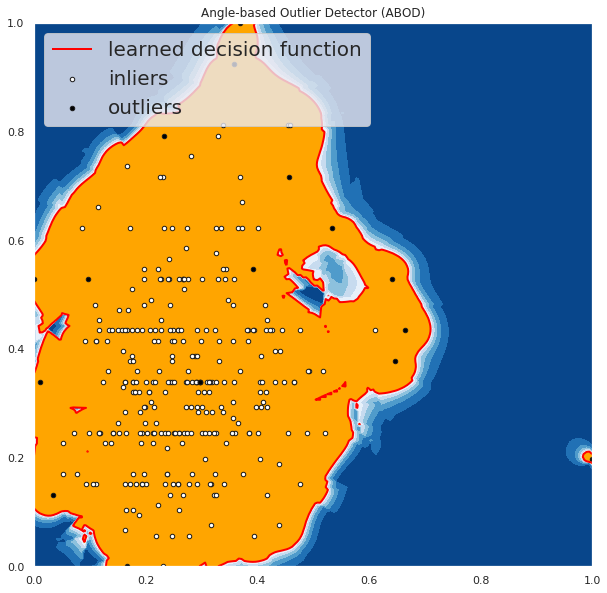

OUTLIERS :  16 INLIERS :  287 Cluster-based Local Outlier Factor (CBLOF)


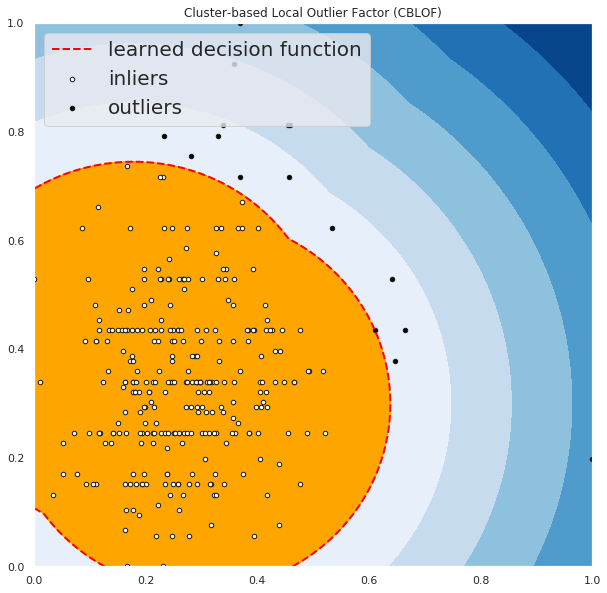

OUTLIERS :  16 INLIERS :  287 Histogram-base Outlier Detection (HBOS)


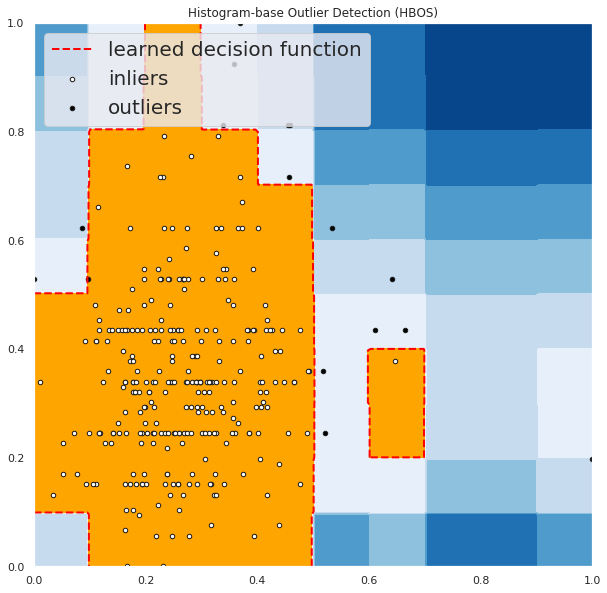

OUTLIERS :  14 INLIERS :  289 K Nearest Neighbors (KNN)


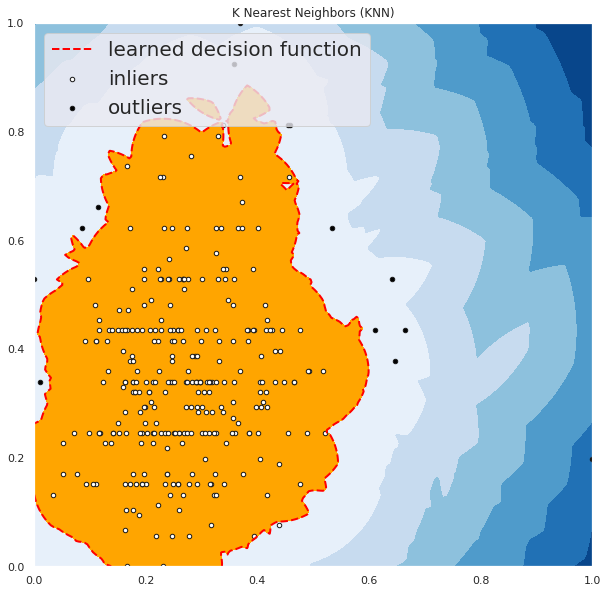

In [0]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df2
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  dfx['chol'][dfx['outlier'] == 0].values
    IX2 =  dfx['trestbps'][dfx['outlier'] == 0].values
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['chol'][dfx['outlier'] == 1].values
    OX2 =  dfx['trestbps'][dfx['outlier'] == 1].values
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

